In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split# Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
SF_salaries=pd.read_csv(r'C:\Users\HELLO\OneDrive\Documents\Total.csv',low_memory=False)
SF_salaries

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,Not Provided,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.00,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.00,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.00,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.00,0.00,0.00,2018


In [3]:
 # Sort the DataFrame by 'EmployeeName' and 'Year' to ensure data is ordered correctly
SF_salaries = SF_salaries.sort_values(by=['EmployeeName', 'Year'])

# Create a new column 'Promotion' to track the promotion status
SF_salaries['Promotion'] = False

# Iterate over the DataFrame and calculate promotions
for i in range(0, len(SF_salaries)-1):
    prev_row = SF_salaries.iloc[i]
    curr_row = SF_salaries.iloc[i+1]
    
    # Check if job title changed to a higher-ranked position a certain percentage
    if curr_row['JobTitle'] is not prev_row['JobTitle'] and curr_row['EmployeeName'] is prev_row['EmployeeName']:
        SF_salaries.at[i, 'Promotion'] = True
 

# Data Cleaning




In [4]:
SF_salaries 

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
29353,A BERNARD FATOOH,SHERIFF'S PROPERTY KEEPER,19969.37,0.00,70.54,Not Provided,20039.91,20039.91,2011,True
102843,A Bernard Fatooh,Sheriff's Property Keeper,23908.50,0.00,15.12,5455.62,23923.62,29379.24,2013,False
66371,A Bernard Fatooh,Sheriff's Property Keeper,18472.35,0.00,27.84,5014.66,18500.19,23514.85,2012,False
140525,A Bernard Fatooh,Sheriff's Property Keeper,24061.35,0.00,0.00,6091.68,24061.35,30153.03,2014,False
179820,A Bernard Fatooh,Sheriff's Property Keeper,26896.89,0.00,0.00,6466.82,26896.89,33363.71,2015,False
...,...,...,...,...,...,...,...,...,...,...
285593,Zuri Jones,Deputy Probation Officer,95199.24,0.00,0.00,41348.54,95199.24,136547.78,2018,False
267722,Zuri S Chavarin Cerda,Public Service Trainee,5857.19,0.00,0.00,84.46,5857.19,5941.65,2017,False
268507,Zuzanna E Czerw,Publ Svc Aide-Asst to Prof,3558.46,0.00,0.00,35.58,3558.46,3594.04,2017,False
310801,Zuzanna E Czerw,Publ Svc Aide-Asst to Prof,3298.78,0.00,0.00,32.99,3298.78,3331.77,2018,False


In [5]:
SF_salaries.size

3128820

In [6]:
# Print the tail of dataset
SF_salaries.tail()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
285593,Zuri Jones,Deputy Probation Officer,95199.24,0.00,0.00,41348.54,95199.24,136547.78,2018,False
267722,Zuri S Chavarin Cerda,Public Service Trainee,5857.19,0.00,0.00,84.46,5857.19,5941.65,2017,False
268507,Zuzanna E Czerw,Publ Svc Aide-Asst to Prof,3558.46,0.00,0.00,35.58,3558.46,3594.04,2017,False
310801,Zuzanna E Czerw,Publ Svc Aide-Asst to Prof,3298.78,0.00,0.00,32.99,3298.78,3331.77,2018,False
270525,Zykeill J Council,Public Service Trainee,35.00,0.00,0.00,0.35,35.00,35.35,2017,False


In [7]:
SF_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312882 entries, 29353 to 270525
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
 9   Promotion         312882 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 32.2+ MB


In [8]:
#check data format 
SF_salaries.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Promotion              bool
dtype: object

In [9]:
#Replace Not Provided values in each column to NAN value to deal with it 
series_list = ['EmployeeName','JobTitle','BasePay', 'OvertimePay', 'OtherPay', 'Benefits','TotalPay','TotalPayBenefits']
for series in series_list:
    for x in SF_salaries.index:
        if SF_salaries.loc[x, series]=='Not Provided':
             SF_salaries.loc[x, series] =pd.NaT
                


In [10]:
#change the wrong data format 
# Convert columns to string
SF_salaries['EmployeeName'] = SF_salaries['EmployeeName'].astype(str)
SF_salaries['JobTitle'] = SF_salaries['JobTitle'].astype(str)
 
# Convert columns to numeric (float)
SF_salaries['BasePay'] = pd.to_numeric(SF_salaries['BasePay'], errors='coerce')
SF_salaries['OvertimePay'] = pd.to_numeric(SF_salaries['OvertimePay'], errors='coerce')
SF_salaries['OtherPay'] = pd.to_numeric(SF_salaries['OtherPay'], errors='coerce')
SF_salaries['Benefits'] = pd.to_numeric(SF_salaries['Benefits'], errors='coerce')

In [11]:
SF_salaries['EmployeeName']= SF_salaries['EmployeeName'].str.title()
SF_salaries['JobTitle'] =SF_salaries['JobTitle'].str.title()
#print(SF_salaries['EmployeeName'])

In [12]:
SF_salaries.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Promotion              bool
dtype: object

In [13]:
#extract the total number of empty cells for each column
cols = SF_salaries.columns
SF_salaries[cols].isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
Promotion               0
dtype: int64

In [14]:
#remove empty cells
SF_salaries['Benefits'].fillna(0,inplace=True)
SF_salaries['BasePay'].fillna(0,inplace=True)
SF_salaries.dropna(inplace = True)

In [15]:
SF_salaries

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
29353,A Bernard Fatooh,Sheriff'S Property Keeper,19969.37,0.0,70.54,0.00,20039.91,20039.91,2011,True
102843,A Bernard Fatooh,Sheriff'S Property Keeper,23908.50,0.0,15.12,5455.62,23923.62,29379.24,2013,False
66371,A Bernard Fatooh,Sheriff'S Property Keeper,18472.35,0.0,27.84,5014.66,18500.19,23514.85,2012,False
140525,A Bernard Fatooh,Sheriff'S Property Keeper,24061.35,0.0,0.00,6091.68,24061.35,30153.03,2014,False
179820,A Bernard Fatooh,Sheriff'S Property Keeper,26896.89,0.0,0.00,6466.82,26896.89,33363.71,2015,False
...,...,...,...,...,...,...,...,...,...,...
285593,Zuri Jones,Deputy Probation Officer,95199.24,0.0,0.00,41348.54,95199.24,136547.78,2018,False
267722,Zuri S Chavarin Cerda,Public Service Trainee,5857.19,0.0,0.00,84.46,5857.19,5941.65,2017,False
268507,Zuzanna E Czerw,Publ Svc Aide-Asst To Prof,3558.46,0.0,0.00,35.58,3558.46,3594.04,2017,False
310801,Zuzanna E Czerw,Publ Svc Aide-Asst To Prof,3298.78,0.0,0.00,32.99,3298.78,3331.77,2018,False


In [16]:
cols = SF_salaries.columns
SF_salaries[cols].isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Promotion           0
dtype: int64

In [17]:
#check for duplicated rows
SF_salaries.duplicated().sum()

0

In [18]:
#Remove all rows with TotalPay equal to zero
SF_salaries[SF_salaries.TotalPay== 0].shape[0]
SF_salaries=SF_salaries[SF_salaries.TotalPay!= 0]

In [19]:
#check for negative values in BasePay column
SF_salaries[SF_salaries['BasePay']<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
270571,Carlos R Castro Santiago,Custodian,-474.40,0.00,-23.72,-79.35,-498.12,-577.47,2017,False
72920,Charles Williams,Junior Clerk,-30.58,45.87,0.00,1.36,15.29,16.65,2012,False
72872,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.00,4.32,54.61,58.93,2012,False
72884,Dimarco Mcghee-Stewart,Junior Clerk,-93.14,139.97,0.00,4.17,46.83,51.00,2012,False
72894,Douglas Avalos,Junior Clerk,-75.67,113.76,0.00,3.39,38.09,41.48,2012,False
72832,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.00,6.56,83.01,89.57,2012,False
72922,John Draper,Clerk,-9.50,14.25,0.00,0.42,4.75,5.17,2012,False
72874,Jordan Li,Junior Clerk,-106.60,159.90,0.00,4.66,53.30,57.96,2012,False
72888,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.00,3.89,43.68,47.57,2012,False
188036,Lubna Kaur,Ps Aide Health Services,-292.40,0.00,0.00,-2.92,-292.40,-295.32,2015,False


In [20]:
#check for negative values in OvertimePay column
SF_salaries[SF_salaries['OvertimePay']<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
189090,Christine Martin,Clinical Nurse Specialist,196388.71,-0.01,250.00,49279.20,196638.70,245917.90,2016,False
90714,Claudia M Sanchez,Senior Eligibility Worker,75033.03,-0.01,1540.00,28864.64,76573.02,105437.66,2013,True
264075,Xiao Ping Zhang,Porter,21792.19,-292.80,94.68,215.96,21594.07,21810.03,2017,False


In [21]:
#Remove the negative values in columns
series_list = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay','TotalPayBenefits','Benefits']
for series in series_list:
    SF_salaries=SF_salaries[SF_salaries[series]>=0]

In [22]:
SF_salaries[SF_salaries['BasePay']<0]


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion


# Data Exploration 

In [23]:
#display statistical sammary
SF_salaries.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312118.000000,312118.000000,312118.000000,312118.000000,312118.000000,312118.000000,312118.000000
mean,69839.609206,5682.623588,3468.466579,22163.114728,78990.699373,101153.814101,2014.625164
std,45362.124738,12758.132646,7393.463046,16288.718155,53154.739296,66404.810655,2.291917
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,2011.000000
25%,35820.085000,0.000000,0.000000,2082.275000,39361.847500,49601.920000,2013.000000
50%,67735.135000,0.000000,736.525000,26802.640000,75035.540000,100183.945000,2015.000000
75%,99343.325000,5249.835000,3968.665000,34311.695000,111528.592500,142513.167500,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [24]:
SF_salaries[SF_salaries.EmployeeName=='A K Finizio']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
140927,A K Finizio,Customer Service Agent Trainee,25478.86,0.00,375.95,258.56,25854.81,26113.37,2014,False
177479,A K Finizio,Customer Service Agent,41472.58,1088.53,368.34,13643.77,42929.45,56573.22,2015,False
211348,A K Finizio,Customer Service Agent,64441.70,754.79,1725.97,25723.05,66922.46,92645.51,2016,False
258121,A K Finizio,Customer Service Agent,55503.36,421.20,0.00,22517.52,55924.56,78442.08,2017,False
298726,A K Finizio,Customer Service Agent,62464.47,1058.18,873.14,24744.05,64395.79,89139.84,2018,False


In [25]:
SF_salaries[SF_salaries.EmployeeName=='Aaran Y Luo']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Promotion
87933,Aaran Y Luo,Transit Operator,66724.34,14958.24,344.20,33122.86,82026.78,115149.64,2013,True
127936,Aaran Y Luo,Transit Operator,59319.16,15642.66,291.02,31501.24,75252.84,106754.08,2014,False
161202,Aaran Y Luo,Transit Operator,68193.76,22133.90,4263.46,34474.85,94591.12,129065.97,2015,False
198835,Aaran Y Luo,Transit Operator,71810.22,33059.77,5529.87,33016.91,110399.86,143416.77,2016,False
238385,Aaran Y Luo,Transit Operator,78178.04,42264.38,6884.74,32864.37,127327.16,160191.53,2017,False
280451,Aaran Y Luo,Transit Operator,80123.20,43396.28,6380.25,34004.69,129899.73,163904.42,2018,False


In [26]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#print(le.fit_transform(SF_salaries['JobTitle'] ))

Building Decision Tree Model

We will choose the responsible Factours for employee promotion

In [27]:
#sellect all factours 
features=['BasePay','OvertimePay','OtherPay','Benefits']
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy' )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8114614037336068


After that,we will choose one Factor and measure the employee's promotion in relation to it

In [29]:
features=[ 'OvertimePay']
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy' )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.853923704558076


In [30]:
features=['Benefits' ]
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy' )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8268721431927891


In [31]:
features=['OtherPay' ]
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy' )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8466615404331668


In [32]:
features=['BasePay' ]
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy' )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8276731171771541


I know that the Accuracy is close to each other, and each one of them, but we will choose the heights Accuracy


In [33]:
features=['OtherPay','OvertimePay' ]
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy' )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8354585843051817


I think the responsible for promoting the employee are Two Factors OtherPay and OvertimePay

we can Optimize Decision Tree Classifier
performed by Maximum depth of the tree can be used as a control variable for pre-pruning

In [43]:
features=['OtherPay','OvertimePay' ]
x=SF_salaries[features]
y= SF_salaries['Promotion']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3 )
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8913772480669828


[Text(0.6666666666666666, 0.875, 'X[1] <= 190862.312\nentropy = 0.496\nsamples = 218482\nvalue = [194751, 23731]'),
 Text(0.5, 0.625, 'X[1] <= 183864.781\nentropy = 0.496\nsamples = 218465\nvalue = [194734, 23731]'),
 Text(0.3333333333333333, 0.375, 'X[1] <= 12882.215\nentropy = 0.496\nsamples = 218464\nvalue = [194734, 23730]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.494\nsamples = 187988\nvalue = [167669, 20319]'),
 Text(0.5, 0.125, 'entropy = 0.506\nsamples = 30476\nvalue = [27065, 3411]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]')]

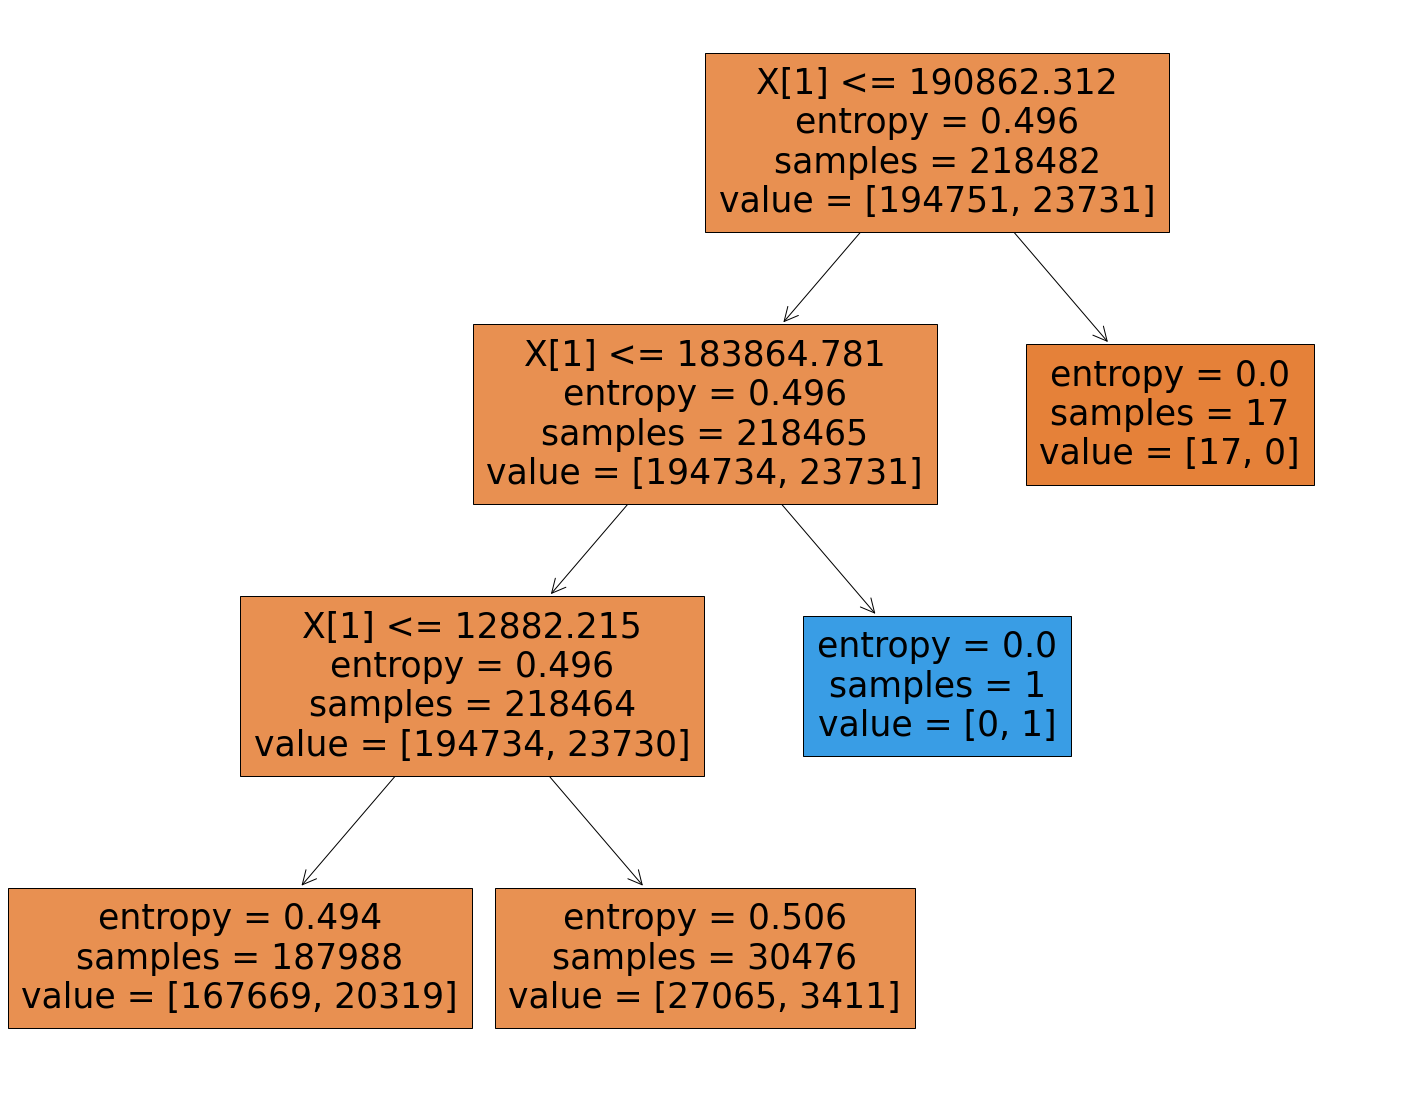

In [52]:
#to Visualize desicion tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)
 